# Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D
from tensorflow.keras.layers import Conv2D
from keras.optimizers import adam_v2
from keras.utils import np_utils
from tensorflow.keras.models import load_model

# Loading the Data

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Analyzing the Data

In [4]:
X_train.shape

(60000, 28, 28)

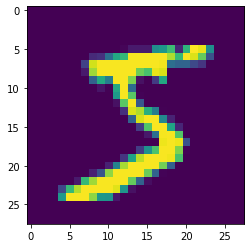

In [5]:
plt.imshow(X_train[0])

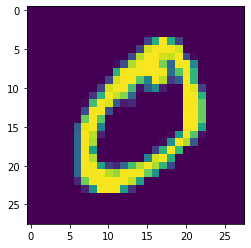

In [6]:
plt.imshow(X_train[1])

# Reshaping the Data

In [7]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_test.shape

(10000, 28, 28, 1)

# Applying One Hot Encoding

In [10]:
number_of_classes = 20

In [11]:
y_train = np_utils.to_categorical(y_train,number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [13]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Create Model and Add CNN Layers

In [14]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(number_of_classes,activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 20)                92180     
                                                                 
Total params: 111,284
Trainable params: 111,284
Non-trainable params: 0
__________________________________________________

# Compiling the Model

In [18]:
optimizer = adam_v2.Adam()
model.compile(loss="categorical_crossentropy", optimizer=optimizer , metrics=['accuracy'])

# Train the model

In [19]:
model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 111s 59ms/step - loss: 0.1866 - accuracy: 0.9547 - val_loss: 0.0710 - val_accuracy: 0.9789
Epoch 2/5
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0647 - accuracy: 0.9802 - val_loss: 0.0553 - val_accuracy: 0.9834
Epoch 3/5
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0487 - accuracy: 0.9850 - val_loss: 0.0575 - val_accuracy: 0.9823
Epoch 4/5
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0409 - accuracy: 0.9866 - val_loss: 0.0708 - val_accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0310 - accuracy: 0.9903 - val_loss: 0.0844 - val_accuracy: 0.9797


# Observing The Metrics

In [20]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test Loss & Test Accuracy):")
print(metrics)

Metrics(Test Loss & Test Accuracy):
[0.08438505977392197, 0.9797000288963318]


# Test The Model

In [21]:
prediction = model.predict(X_test[:4])
print(prediction)

[[1.73242150e-12 1.06171652e-15 1.58894620e-09 1.45628343e-10
  2.53214813e-18 3.71807357e-15 2.67170917e-17 1.00000000e+00
  1.40333569e-11 4.28273750e-10 7.37911217e-15 1.26464958e-14
  5.44805798e-11 4.61541070e-13 1.35264121e-15 1.75186981e-16
  1.12303194e-14 1.08337115e-16 1.29929552e-14 1.66682718e-14]
 [8.89728916e-12 1.05766203e-11 9.99999881e-01 2.03288754e-15
  2.28418147e-15 8.06726876e-21 1.25670695e-07 5.69765050e-17
  2.77084806e-15 3.83805518e-17 8.37607803e-18 6.63925931e-17
  1.93072203e-15 1.45538392e-17 2.01499000e-16 1.41081702e-16
  1.99628278e-17 1.02175513e-16 2.53715749e-17 7.46939130e-17]
 [1.64923925e-11 9.99907732e-01 2.00336743e-07 3.17108284e-11
  7.85374068e-05 1.95353577e-11 8.20397688e-08 1.12569242e-05
  2.21319988e-06 3.83552390e-08 1.73834403e-13 5.03980321e-13
  1.62984097e-08 1.72564064e-11 1.06949116e-09 1.35153347e-12
  7.54658814e-13 3.27555105e-12 3.55107491e-13 1.33685746e-13]
 [9.99998808e-01 1.02004256e-12 6.85186219e-09 7.13086923e-10
  1.1

In [22]:
print(np.argmax(prediction,axis = 1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Save The Model

In [23]:
model.save("MNIST.h5")

In [24]:
!tar -zcvf MNIST.tar MNIST.h5

MNIST.h5


In [25]:
!pip install ibm_watson_machine_learning 
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 14.8 MB/s eta 0:00:01


In [26]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey":"w_fbkrCLn2VxO0eXfisA-5k4BGtzO0ndwBjjiKmbEsrd"
}
client = APIClient(wml_credentials)
client

In [27]:
client.spaces.get_details()

{'resources': []}

In [28]:
def guid_space_name(client,deploy):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [31]:
space_uid = guid_space_name(client,'Digit space')
print("Space UID = " + space_uid)

Space UID = b9cd97e6-6888-4c1b-b5b3-cfc2ebc92a06


In [32]:
client.set.default_space(space_uid)

'SUCCESS'

In [33]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [45]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [46]:
model_details = client.repository.store_model(model = 'MNIST.tar',meta_props={
    client.repository.ModelMetaNames.NAME:"Handwritten Digit Recognition",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [47]:
model_id = client.repository.get_model_id(model_details)
model_id

'6a09ae11-f54a-418f-89c7-5e6ad9b8c970'

In [49]:
client.repository.download(model_id,"Digit Recognition.tar.gz")

Successfully saved model content to file: 'Digit Recognition.tar.gz'


'/home/wsuser/work/Digit Recognition.tar.gz'